# Tutorial 1: Parametrizing our first molecule

Let's parametrize our first molecule with `auto_martini`. 

We will focus on phenylmethanimine. Feeding only its SMILES string (`N=Cc1ccccc1`), `auto_martini` will output a coarse-grained topology file (`.top`), and both atomistic and coarse-grained coordinate files (`.gro`). All files are compatible with the [GROMACS](https://www.gromacs.org) molecular dynamics software. We will also use `rdkit` to render the molecular structure, and where the CG beads map.

In [3]:
import auto_martini as am
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
print(rdkit.__version__)

2019.09.3


# Atomistic structure of the molecule

We first feed in the SMILES string of phenylmethanimine into the `rdkit` to render its 2-dimensional structure. This includes adding hydrogens to the molecule.

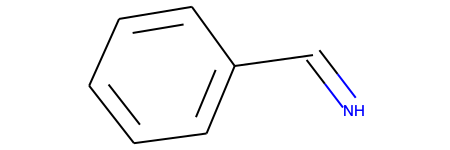

In [4]:
smiles = "N=Cc1ccccc1"
mol = Chem.MolFromSmiles(smiles)
Chem.AddHs(mol)
AllChem.EmbedMolecule(mol)
mol

`auto_martini` has its own function to read in a SMILES string, create a *3-dimensional* conformer, and return an `rdkit` molecule object. We'll use that here:

In [6]:
mol_am, _ = am.topology.gen_molecule_smi(smiles)

We feed in the `rdkit` molecule object `mol_am` into the `auto_martini` solver. This is reponsible to analyze the molecular structure, map it to coarse-grain beads, and determine both intra and intermolecular interactions. We'll call our molecule `PHM`. This should only take a couple seconds to run. 

(Expect the code to take much longer once you work with much larger molecules, due to the way it combinatorially tries out coarse-grained bead placements. The code currently does not run well beyond $\approx 20$ heavy (non-hydrogen) atoms.)

In [7]:
cg = am.solver.Cg_molecule(mol_am, "PHM")

Converged to solution in 1 iteration(s)


This is it! Now attributes of the object `cg` contain the coarse-grained force field. 

First the topology, where the following would typically be saved to a `.top` file for a GROMACS simulation. It displays 3 coarse-grained beads, two of which are identical and one is different (due to the terminal group). These three beads are covalently bonded by constraints, due to the aromatic ring.

In [8]:
print(cg.topout)

; GENERATED WITH auto_Martini vv0.1.0+0.gdf328d2.dirty for PHM
; Developed by: Kiran Kanekal, Tristan Bereau, and Andrew Abi-Mansour

[moleculetype]
; molname       nrexcl
  PHM           2

[atoms]
; id    type    resnr   residue  atom    cgnr    charge  smiles
    1     SNd     1     PHM       S01     1         0   ; N=Cc1ccccc1
    2     SC5     1     PHM       S02     2         0   ; c1ccccc1
    3     SC5     1     PHM       S03     3         0   ; c1ccccc1


[constraints]
;  i   j     funct   length
   1   2     1       0.24
   1   3     1       0.24
   2   3     1       0.24



That's not it. For an MD simulation, we will also need a coarse-grained coordinate file (`.gro`). Use the `output_cg` function, and make sure to use the same molecule name used in the topology file. The function `output_cg` also optionally allows you to directly save this to a text file, by specifying the file name in the option`cg_output`.

The `10.00000  10.00000  10.00000` at the bottom of the file are simple placeholders for the box size.

In [9]:
print(cg.output_cg(molname="PHM"))

PHM generated from auto_martini
    3
    1PHM    S01    1   0.026   0.009  -0.006
    2PHM    S02    2   0.031   0.250  -0.042
    3PHM    S03    3   0.111   0.159   0.167
  10.00000  10.00000  10.00000



Same thing if you're interested in getting an *atomistic* coordinate file, also `.gro`:

In [10]:
print(cg.output_aa(molname="PHM"))

PHM generated from auto_martini
    8
    1PHM    N      1   0.010  -0.235   0.007
    2PHM    C      2  -0.008  -0.125  -0.059
    3PHM    C      3   0.026   0.009  -0.006
    4PHM    C      4   0.001   0.121  -0.087
    5PHM    C      5   0.031   0.250  -0.042
    6PHM    C      6   0.086   0.269   0.085
    7PHM    C      7   0.111   0.159   0.167
    8PHM    C      8   0.082   0.030   0.123
  10.00000  10.00000  10.00000



# Conclusions

That's it! Congratulations on completing this first tutorial. You have parametrized your first molecule with `auto_martini`. In the second tutorial, we'll have a visual look at which atoms got mapped on which coarse-grained beads.